In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("/content/Instagram data.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [2]:
data.isnull().sum()

,0
Impressions,0
From Home,0
From Hashtags,0
From Explore,0
From Other,0
Saves,0
Comments,0
Shares,0
Likes,0
Profile Visits,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [4]:
# Summary statistics
print(data.describe())




        Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.089205   82.378947       87.08

In [5]:
import plotly.express as px

# Filter only numeric columns except for Impressions (as we already use it for x-axis)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col not in ['Impressions', 'Captions', 'Hashtags']]

# Loop through each column and create a scatter plot with Impressions on the x-axis
for col in numeric_columns:
    figure = px.scatter(data_frame=data, x="Impressions", y=col,
                        size=col, trendline="ols",
                        title=f"Relationship Between {col} and Impressions")
    figure.show()


In [12]:
import plotly.express as px

# Loop through relevant columns and create scatter plots
for col in ['Likes', 'Comments', 'Saves', 'Shares']:
    fig = px.scatter(data, x="Impressions", y=col, trendline="ols",
                     title=f"Relationship Between Impressions and {col}")
    fig.show()


In [7]:
# Select only the numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation = numeric_data.corr()

# Display the correlations for Impressions, sorted in descending order
print(correlation["Impressions"].sort_values(ascending=False))


Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


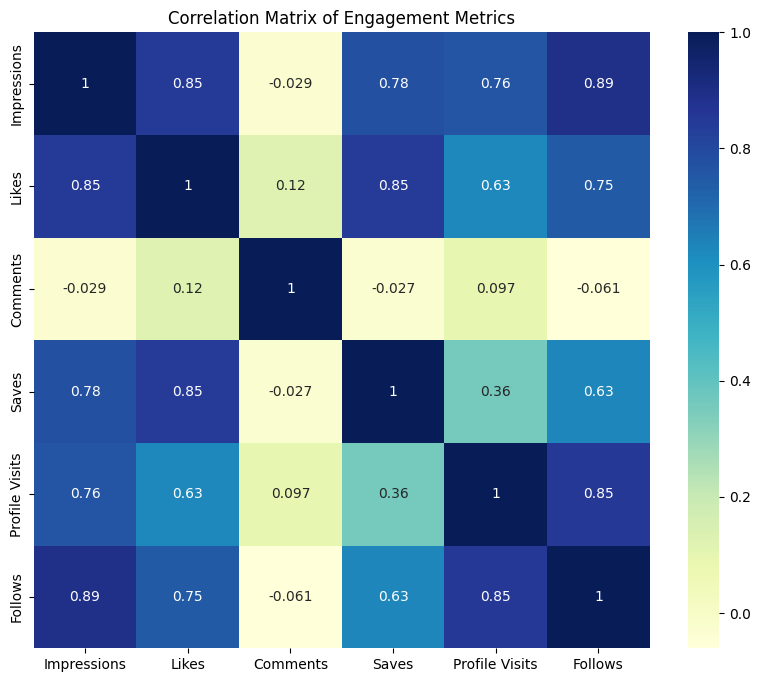

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns
numeric_columns = ['Impressions', 'Likes', 'Comments', 'Saves', 'Profile Visits', 'Follows']
correlation_matrix = data[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", square=True)
plt.title("Correlation Matrix of Engagement Metrics")
plt.show()


In [8]:
import plotly.express as px

# Reshape data to long format for source-based impression analysis
impressions_data = data[['From Home', 'From Hashtags', 'From Explore', 'From Other']].sum().reset_index()
impressions_data.columns = ['Source', 'Impressions']

# Plot the pie chart
fig = px.pie(impressions_data, values='Impressions', names='Source',
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()


In [13]:
# Melt the data to create a source-specific plot
source_data = data[['From Home', 'From Hashtags', 'From Explore', 'From Other']].sum().reset_index()
source_data.columns = ['Source', 'Total Impressions']

# Plot a bar chart for each source's impact on Impressions
fig = px.bar(source_data, x='Source', y='Total Impressions', title="Impressions by Source")
fig.show()


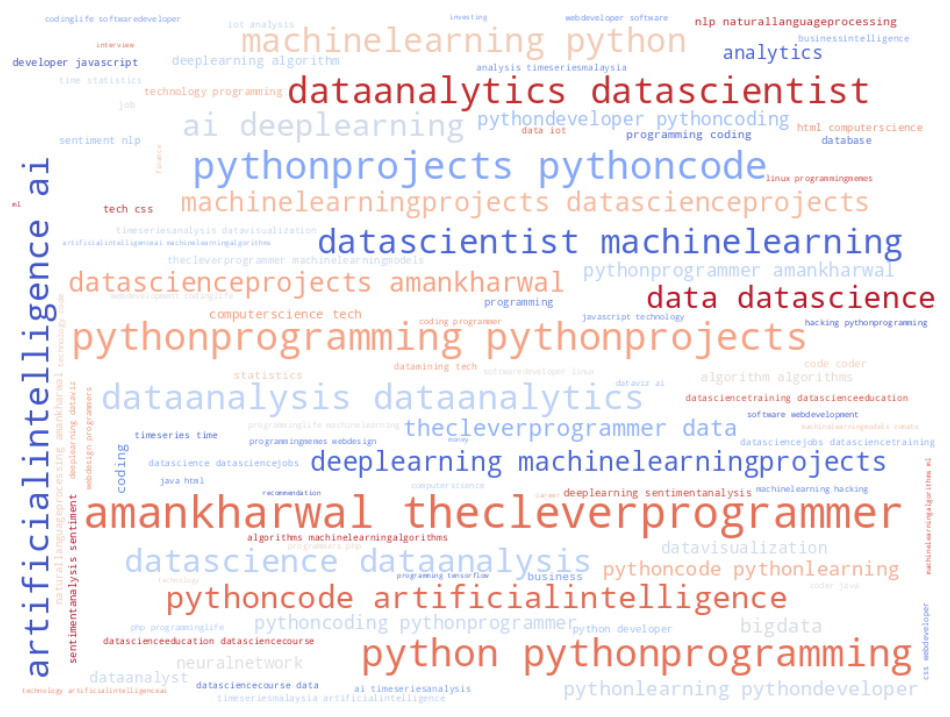

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

# Join all hashtags into a single text block
text = " ".join(i for i in data.Hashtags)

# Preprocess hashtags: remove `#`, make lowercase, and split compound words
text = re.sub(r'#', '', text).lower()
text = re.sub(r'([a-z])([A-Z])', r'\1 \2', text)  # Separate camel case (e.g., DataScience -> Data Science)

# Define custom stopwords (optional: add any domain-specific words to exclude)
stopwords = set(STOPWORDS)
custom_stopwords = {'instagram', 'follow', 'like', 'insta'}  # Add any additional terms here
stopwords.update(custom_stopwords)

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white",
                      colormap='coolwarm', width=800, height=600,
                      max_words=100, contour_color='steelblue',
                      contour_width=1).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


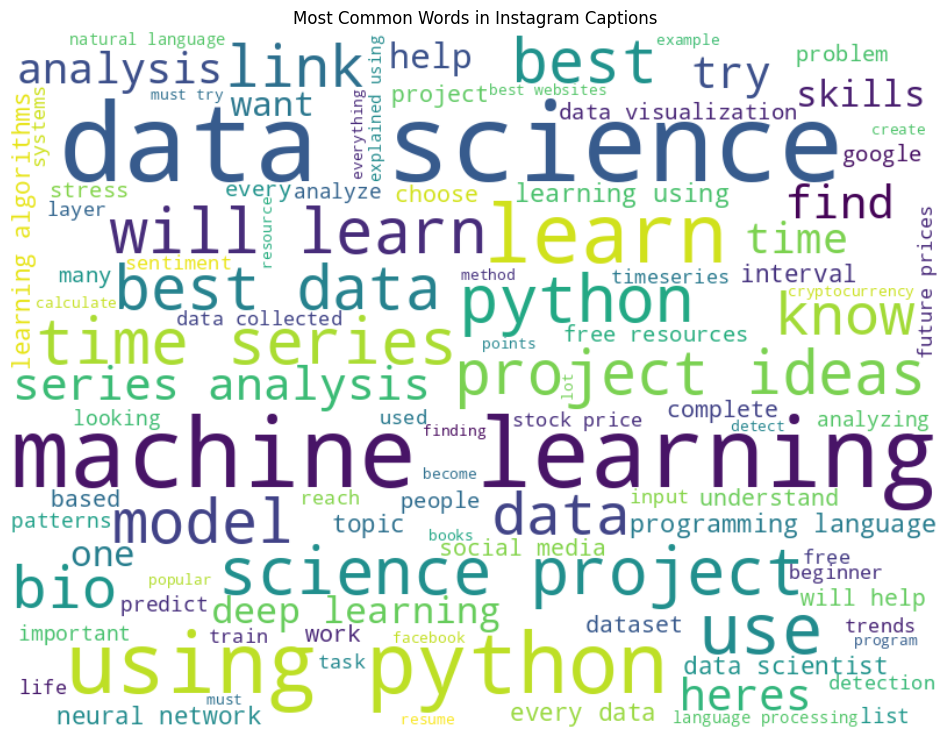

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

# Join all captions into a single text block
text = " ".join(str(i) for i in data.Caption)

# Preprocess text: convert to lowercase, remove punctuation, and split words
text = text.lower()
text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

# Define custom stopwords (e.g., add any less informative terms you want to exclude)
stopwords = set(STOPWORDS)
custom_stopwords = {'instagram', 'post', 'photo', 'day', 'like', 'follow'}  # Add terms here
stopwords.update(custom_stopwords)

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white",
                      colormap='viridis', width=800, height=600,
                      max_words=100, contour_color='black',
                      contour_width=1).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Instagram Captions")
plt.show()


In [14]:
# Calculate caption length
data['Caption Length'] = data['Caption'].apply(lambda x: len(str(x).split()))

# Plot caption length vs. impressions
fig = px.scatter(data, x="Caption Length", y="Impressions", trendline="ols",
                 title="Impressions vs. Caption Length")
fig.show()

# Analyze the frequency of hashtags and their impact on engagement
hashtag_counts = data['Hashtags'].apply(lambda x: len(str(x).split()))
fig = px.scatter(data, x=hashtag_counts, y="Impressions", trendline="ols",
                 title="Impressions vs. Number of Hashtags")
fig.show()


In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import plotly.express as px

# Prepare data for clustering
features = data[['Impressions', 'Likes', 'Comments', 'Saves', 'Profile Visits', 'Follows']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters as needed
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Melt data for visualization
melted_data = pd.melt(data, id_vars=['Impressions', 'Cluster'], value_vars=['Likes', 'Comments', 'Saves', 'Shares'],
                      var_name='Metric', value_name='Engagement')

# Plot the clusters with multiple engagement metrics
fig = px.scatter(melted_data, x='Impressions', y='Engagement', color='Cluster',
                 facet_col='Metric', facet_col_wrap=2,  # Facet each metric into subplots
                 title="Clustered Post Types Based on Impressions and Engagement Metrics",
                 labels={'Engagement': 'Engagement Count', 'Metric': 'Engagement Metric'})

fig.update_traces(marker=dict(size=8), mode="markers")
fig.show()
